# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [2]:
# The following imports are assumed for the rest of  the problems
import numpy as np
import math
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt

# Gradient Descent Algo:

In [21]:
def test(f, df, vals, left_limit, right_limit, rate=0.2, e=10e-6, o=10e+6, iter=10000):
    
    coords = []
    
    for i in range(len(vals)):
        sys_break = 0
        cal = vals[i]
        for iterations in range(10000):
            grad = df(cal)
            norm = 0
            for i in grad:
                norm += i**2
            norm = math.sqrt(norm)

            if norm < e:
                break

            for k in range(len(cal)):
                cal[k] -= rate*(grad[k])
           
            for i in cal:
                approx_i = round(i, 1)
                if limits_check(approx_i, left_limit, right_limit) == False:
                    sys_break = 1
            
            if sys_break == 1:
                break
        
        for i in cal:
            if round(i, 1) == float(round(left_limit, 1)) or round(i, 1) == float(round(right_limit, 1)):
                sys_break = 1
        
        if sys_break == 0:
            cal = [round(n, 1) for n in cal]
            coords.append(cal)
    
    unique_pairs = set()

    for pair in coords:
        unique_pairs.add(tuple(pair))

    unique_pairs = list(unique_pairs)
    
    if len(coords) == 0:
        print(f"There are no minimas for this function in the specified given range")
        return
    
    if len(coords[0]) == 1:
        x = [row[0] for row in unique_pairs]
        y = []
        for i in range(len(x)):
            input_y = [x[i]]
            y.append(f(input_y))
            
        for i in range(len(unique_pairs)):
            print(f"The coordinates of minima {i+1} are ({x[i]}, {round(y[i], 1)})")
            
        return x, y
    
    if len(coords[0]) == 2:
        x = [row[0] for row in unique_pairs]
        y = [row[1] for row in unique_pairs]
        z = []
        for i in range(len(x)):
            input_z = [x[i], y[i]]
            z.append(f(input_z))
  
        for i in range(len(unique_pairs)):
            print(f"The coordinates of minima {i+1} are ({x[i]}, {y[i]}, {round(z[i], 1)})")
            
        return x, y, z

The `test` function here implements the generalised `gradient descent` algorithm which can be used to find minima's of a multi-variable function. The function can be any variable starting from 1 and going till any number of variables you want.

To solve the problem of multiple minima's is solved using a list of inputs between the limits given so that not a single one would be missed. But this would append the same minima given from multiple inputs, so for this I am adding that particular minima in a set and then converting to a list so that the repeatation will not create an issue.

Another issue that might come is the gradient descent can go to the minimas which doesn't lie in the range provided to us. So for that I am just using limit check function which would check whether the given `x` at a particular instant is between limits or not and if it is not the given input value is discarded.\

The above system check for the minima to stand in the range provided in the above function `limit_check` and `sys_break` are used.

These were the major issues which can come while solving for minimas using gradient descent method. So apart from this I have followed the general procedure only to calculate the minima which was discussed in class and hence at the end I am returning the coordinates of minima as well as priniting a statement for all the minimas of the respective function.

In [10]:
def limits_check(check, left, right):
    if check > right or check < left:
        return False
    
    return True

As I told earlier this is a `limits_check` function which will check whether the input which we are using right now is in the specified limited region given to us or not.

In [11]:
def get_coords_single_var(function, initial_values):
    x_coords = []
    y_coords = []
    for i in initial_values:
        x, = i
        x_coords.append(x)
        y_coords.append(function(i))
        
    return x_coords, y_coords

I have created this function to give me x and y coordinates of a 1 variable function from the input list which we are giving to the gradient descent function in such a way that it can be user friendly and useful for creating graohs in the latter section of this code

In [12]:
def get_coords_doube_var(function, initial_values):
    x_coords = []
    y_coords = []
    z_coords = []
    for i in initial_values:
        x, y = i
        x_coords.append(x)
        y_coords.append(y)
        z_coords.append(function(i))
        
    return x_coords, y_coords, z_coords

Similarly like above this piece of code give us x, y and z coordinates of a 2 varialbe function.

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

The coordinates of minima 1 are (-1.5, 5.8)


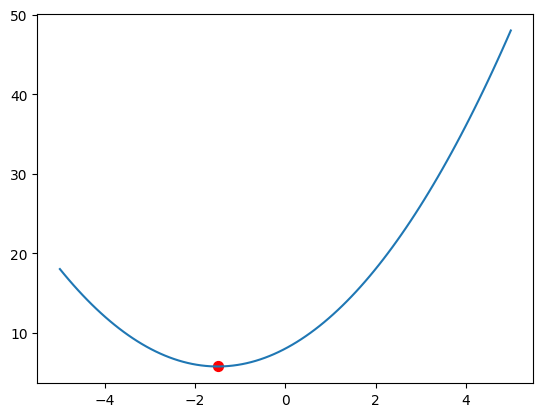

In [13]:
x = np.linspace(-5, 5, 100)
coords = []
for i in range(len(x)):
    coords.append([x[i]])                   
        
def f1(val):
    x, = val
    return x**2 + 3*x + 8

def f1d(val):
    x, = val
    return np.array([2*x + 3])

x1, y1 = get_coords_single_var(f1, coords)
plt.plot(x1, y1)

a, b = test(f1, f1d, coords, -5, 5)

plt.scatter(a, b, s=50, c='red', marker='o')
plt.show()

The coordinates of minima 1 are (0.3, 0.8)
The coordinates of minima 2 are (-0.2, -1.0)
The coordinates of minima 3 are (0.8, 0.8)
The coordinates of minima 4 are (-0.7, 1.1)
The coordinates of minima 5 are (-1.1, 0.6)
The coordinates of minima 6 are (-1.6, 2.3)
The coordinates of minima 7 are (-2.4, 5.4)
The coordinates of minima 8 are (-0.8, 0.5)
The coordinates of minima 9 are (1.1, 1.8)
The coordinates of minima 10 are (1.6, 2.8)
The coordinates of minima 11 are (0.7, -0.1)
The coordinates of minima 12 are (-0.3, -0.6)
The coordinates of minima 13 are (-1.0, 0.0)
The coordinates of minima 14 are (-2.5, 5.3)
The coordinates of minima 15 are (-2.0, 4.3)
The coordinates of minima 16 are (1.5, 1.7)
The coordinates of minima 17 are (1.0, 2.0)
The coordinates of minima 18 are (-1.7, 2.0)
The coordinates of minima 19 are (-1.2, 1.6)
The coordinates of minima 20 are (-0.4, 0.2)
The coordinates of minima 21 are (-2.1, 5.3)
The coordinates of minima 22 are (-0.9, 0.0)
The coordinates of mini

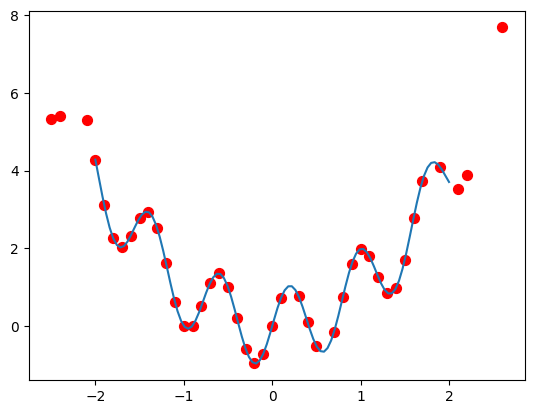

In [24]:
x = np.linspace(-2, 2, 100)
coords = []
for i in range(len(x)):
    coords.append([x[i]])

def y(val):
    x, = val
    return x**2 + sin(8*x)

def d(val):
    x, = val
    return np.array([2*x + 8*cos(8*x)])

x1, y1 = get_coords_single_var(y, coords)
plt.plot(x1, y1)

a, b = test(y, d, coords, -4, 4)

plt.scatter(a, b, s=50, c='red', marker='o')
plt.show()

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

The coordinates of minima 1 are (4.0, 2.0, 2.0)


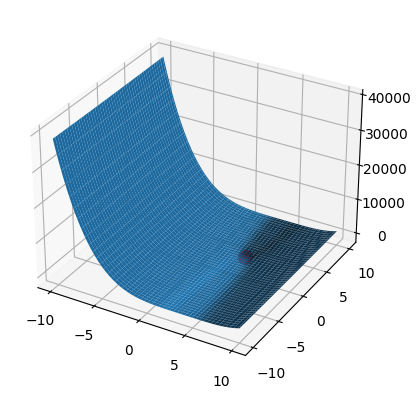

In [692]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

coords = []
for i in range(len(x)):
    coords.append([x[i], y[i]])

def f3(values):
    x, y = values
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def f3_d(values):
    x, y = values
    return np.array([4*x**3 - 48*x**2 + 192*x - 256, 2*y - 4])

x_coords = np.outer(np.linspace(-10, 10, 100), np.ones(100))
y_coords = x_coords.copy().T
z_coords = x_coords**4 - 16*x_coords**3 + 96*x_coords**2 - 256*x_coords + y_coords**2 - 4*y_coords + 262

ax = plt.axes(projection ='3d')
ax.plot_surface(x_coords, y_coords, z_coords)

a, b, c = test(f3, f3_d, coords, -10, 10)
ax.scatter3D(a, b, c, s=100, c='r', marker='o')
plt.show()   

## Problem 3 - 2-D function 

Derivatives and limits given. 

The coordinates of minima 1 are (-1.6, -1.6, -1.0)


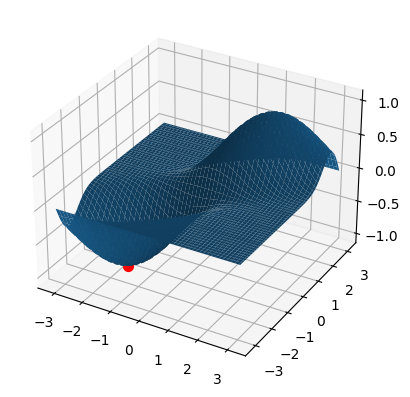

In [693]:
xlim4 = [-pi, pi]
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)

coords = []
for i in range(len(x)):
    coords.append([x[i], y[i]])
    
def f4(value):
    x, y = value
    return exp(-(x - y)**2)*sin(y)

def f4d(value):
    x, y = value
    return np.array([-2*exp(-(x - y)**2)*sin(y)*(x - y), exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)])

x_coords = np.outer(np.linspace(-np.pi, np.pi, 100), np.ones(100))
y_coords = x_coords.copy().T
z_coords = exp(-(x_coords - y_coords)**2)*sin(y_coords)

ax = plt.axes(projection ='3d')
ax.plot_surface(x_coords, y_coords, z_coords)

x, y, z = test(f4, f4d, coords, -np.pi, np.pi)
ax.scatter(x, y, z, s=50, c='r', marker='o')
plt.show()

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

The coordinates of minima 1 are (8.4, -3.0)
The coordinates of minima 2 are (21.0, -2.8)
The coordinates of minima 3 are (1.3, -3.3)
The coordinates of minima 4 are (17.1, -2.1)
The coordinates of minima 5 are (20.1, -3.1)
The coordinates of minima 6 are (4.5, -2.1)
The coordinates of minima 7 are (10.8, -2.1)
The coordinates of minima 8 are (7.5, -3.0)
The coordinates of minima 9 are (2.1, -3.1)
The coordinates of minima 10 are (14.7, -2.9)
The coordinates of minima 11 are (13.8, -3.1)
The coordinates of minima 12 are (23.4, -2.1)


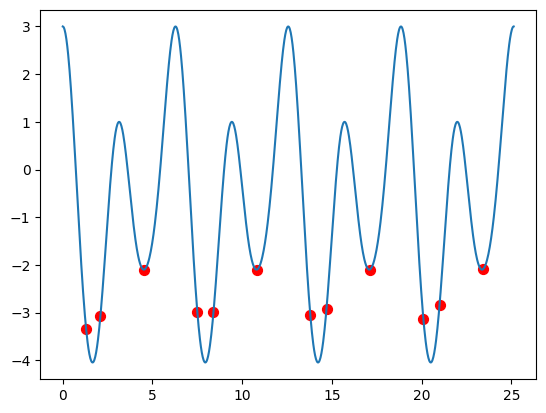

In [28]:
x = np.linspace(0, 8*(np.pi), 1000)

coords = []
for i in range(len(x)):
    coords.append([x[i]])
    
def f5(value):
    x, = value
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def f5d(value):
    x, = value
    term1 = -4*(cos(x)**3)*(sin(x))
    term2 = -3*(sin(x)**2)*(cos(x))
    term3 = -8*sin(x)*cos(x)
    term4 = -sin(x)
    term = term1 + term2 + term3 + term4
    return np.array([term])

x4, y4 = get_coords_single_var(f5, coords)
plt.plot(x4, y4)

a, b = test(f5, f5d, coords, 0, 8*(np.pi))
plt.scatter(a, b, s=50, c='red', marker='o')

# Animations:

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].